In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer_df = pd.read_csv(os.path.join("data.csv"))
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [3]:
cancer_df.loc[(cancer_df.diagnosis == 'B'),'diagnosis']='Benign'
cancer_df.loc[(cancer_df.diagnosis == 'M'),'diagnosis']='Malignant'

In [4]:
cancer_df.rename(columns = {'id':'Paitent ID', 'diagnosis':'Diagnosis'
                            , 'radius_mean':'Radius (Mean)', 'texture_mean':'Texture (Mean)', 'perimeter_mean':'Perimeter (Mean)'
                           , 'area_mean':'Area (Mean)', 'smoothness_mean':'Smoothness (Mean)', 'compactness_mean':'Compactness (Mean)', 'concavity_mean':'Concavity (Mean)', 'concave points_mean':'Concave Points (Mean)'
                           , 'symmetry_mean':'Symmetry (Mean)', 'fractal_dimension_mean':'Fractal Dimension (Mean)'
                            , 'radius_se':'Radius (Standard Error)', 'texture_se':'Texture (Standard Error)', 'perimeter_se':'Perimeter (Standard Error)'
                            , 'area_se':'Area (Standard Error)', 'smoothness_se':'Smoothness (Standard Error)', 'compactness_se':'Compactness (Standard Error)', 'concavity_se':'Concavity (Standard Error)', 'concave points_se':'Concave Points (Standard Error)'
                            , 'symmetry_se':'Symmetry (Standard Error)', 'fractal_dimension_se':'Fractal Dimension (Standard Error)'
                            , 'radius_worst':'Radius (Worst)', 'texture_worst':'Texture (Worst)', 'perimeter_worst':'Perimeter (Worst)'
                           , 'area_worst':'Area (Worst)', 'smoothness_worst':'Smoothness (Worst)', 'compactness_worst':'Compactness (Worst)', 'concavity_worst':'Concavity (Worst)', 'concave points_worst':'Concave Points (Worst)'
                           , 'symmetry_worst':'Symmetry (Worst)', 'fractal_dimension_worst':'Fractal Dimension (Worst)'
                           }, inplace = True) 


In [5]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [6]:
cancer_df.to_csv(r"C:\Users\minam\Documents\BOOTCAMP\PROJECT_3\Final-Project-master\Cancer_Data.csv")
                 

In [7]:
X = cancer_df.drop("Diagnosis", axis=1)
y = cancer_df["Diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


# Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6431924882629108
Testing Data Score: 0.5804195804195804


In [12]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign'
 'Benign' 'Benign']
First 10 Actual labels: ['Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign']


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Benign,Malignant
1,Benign,Malignant
2,Benign,Benign
3,Benign,Benign
4,Benign,Benign
...,...,...
138,Benign,Malignant
139,Benign,Benign
140,Benign,Benign
141,Benign,Benign


# KNN

In [14]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [15]:
y = cancer_df["Diagnosis"]

In [16]:
X_df = cancer_df.drop("Diagnosis", axis =1)
X = X_df.drop("Paitent ID", axis =1)

X.head()

,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),Symmetry (Mean),Fractal Dimension (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.916
k: 3, Train/Test Score: 0.958/0.923
k: 5, Train/Test Score: 0.944/0.930
k: 7, Train/Test Score: 0.944/0.916
k: 9, Train/Test Score: 0.944/0.916
k: 11, Train/Test Score: 0.946/0.923
k: 13, Train/Test Score: 0.944/0.923
k: 15, Train/Test Score: 0.937/0.930
k: 17, Train/Test Score: 0.937/0.930
k: 19, Train/Test Score: 0.937/0.930


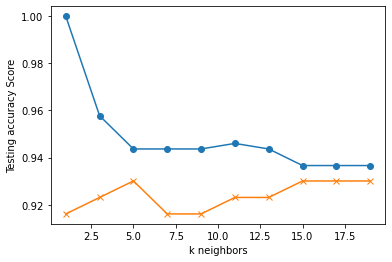

In [18]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.923


# Random Forrest

In [20]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [21]:
feature_names = X.columns
target_names = ["negative", "positive"]

In [22]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [24]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.


In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train_categorical)
clf.score(X_test, y_test_categorical)

0.916083916083916

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train_categorical)
rf.score(X_test, y_test_categorical)

0.958041958041958

In [27]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.13837865328722904, 'Area (Worst)'),
 (0.12690615528139007, 'Concave Points (Worst)'),
 (0.1234303439572677, 'Radius (Worst)'),
 (0.10909701829741111, 'Perimeter (Worst)'),
 (0.0799982747968158, 'Concave Points (Mean)'),
 (0.0516788583487961, 'Concavity (Mean)'),
 (0.04723928149908427, 'Area (Standard Error)'),
 (0.045727391619860364, 'Area (Mean)'),
 (0.039738114472495194, 'Perimeter (Mean)'),
 (0.0346178965165232, 'Radius (Mean)'),
 (0.031326032663252845, 'Concavity (Worst)'),
 (0.02373250008745949, 'Compactness (Worst)'),
 (0.021871842514110347, 'Radius (Standard Error)'),
 (0.015100201030719749, 'Compactness (Mean)'),
 (0.014604446027001897, 'Smoothness (Worst)'),
 (0.013157155911557365, 'Texture (Worst)'),
 (0.011321515647313549, 'Texture (Mean)'),
 (0.010803730374495009, 'Symmetry (Worst)'),
 (0.009077780882596602, 'Fractal Dimension (Worst)'),
 (0.006312212591255439, 'Smoothness (Mean)'),
 (0.00571206304467743, 'Concave Points (Standard Error)'),
 (0.005229981430818638, 'Peri

In [28]:
#Build lists for mean and SEM Value for radius and permiter values
#Radius (Mean)
radius_means = cancer_df.loc[:, ['Radius (Mean)']]
radius_means = radius_means['Radius (Mean)']

#Perimeter (Worst)
perimeter_means = cancer_df.loc[:, ['Perimeter (Worst)']]
perimeter_means = perimeter_means['Perimeter (Worst)']


No handles with labels found to put in legend.


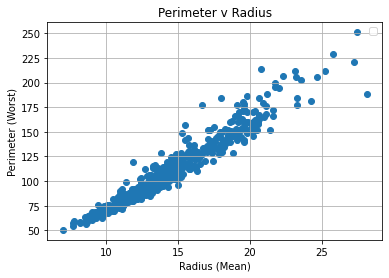

In [29]:
# Generate the Plot (with Error Bars)
#Min/Max values for volume to determine limits on plot chart
min_volume = cancer_df.min()['Radius (Mean)']
max_volume = cancer_df.max()['Radius (Mean)']
max_yvolume = cancer_df.max()['Perimeter (Worst)']

#create additional white space on plot chart
min_volume = min_volume - 1
max_volume = max_volume + 1
max_yvolume = max_yvolume + 2
#Limits, background grid, title, labels
plt.grid(True)

plt.ylabel("Perimeter (Worst)")
plt.xlabel("Radius (Mean)")
plt.title("Perimeter v Radius")
plt.scatter(radius_means, perimeter_means)
plt.legend(frameon=True)
plt.show()


# SVM

In [30]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [31]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.972


In [33]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.98        80
    positive       1.00      0.94      0.97        63

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# GridSearch

In [34]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [35]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [36]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.930, total=   1.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.929, total=   5.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.976, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.918, total=   3.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.953, total=   2.8s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.930, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.929, total=   3.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.976, total=   1.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.918, total=   3.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [37]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [38]:
# List the best score
print(grid.best_score_)

0.955376196990424


In [39]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [40]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.96      1.00      0.98        80
         red       1.00      0.95      0.98        63

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# NN

In [41]:
cancer_df.head()

,Paitent ID,Diagnosis,Radius (Mean),Texture (Mean),Perimeter (Mean),Area (Mean),Smoothness (Mean),Compactness (Mean),Concavity (Mean),Concave Points (Mean),...,Radius (Worst),Texture (Worst),Perimeter (Worst),Area (Worst),Smoothness (Worst),Compactness (Worst),Concavity (Worst),Concave Points (Worst),Symmetry (Worst),Fractal Dimension (Worst)
0,8670,Malignant,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,Benign,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,Benign,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,Malignant,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [42]:
# Step 0: Reformat data
data = cancer_df.values
X = data[:, 2:35]
y = data[:, 1]

In [43]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [44]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [45]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [46]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [47]:
print(X_train.shape)

(426, 30)


In [48]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [50]:
from tensorflow.keras.layers import Dense
number_inputs = 30
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [51]:
number_classes = 2
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=number_classes, activation='softmax'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 124       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
print(X_train_scaled.shape)
print(y_train_categorical.shape)

(426, 30)
(426, 2)


In [55]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
14/14 - 0s - loss: 0.7876 - accuracy: 0.1479
Epoch 2/1000
14/14 - 0s - loss: 0.7430 - accuracy: 0.2277
Epoch 3/1000
14/14 - 0s - loss: 0.7084 - accuracy: 0.3709
Epoch 4/1000
14/14 - 0s - loss: 0.6826 - accuracy: 0.5634
Epoch 5/1000
14/14 - 0s - loss: 0.6605 - accuracy: 0.6315
Epoch 6/1000
14/14 - 0s - loss: 0.6359 - accuracy: 0.6502
Epoch 7/1000
14/14 - 0s - loss: 0.6040 - accuracy: 0.6502
Epoch 8/1000
14/14 - 0s - loss: 0.5606 - accuracy: 0.6502
Epoch 9/1000
14/14 - 0s - loss: 0.5075 - accuracy: 0.6502
Epoch 10/1000
14/14 - 0s - loss: 0.4579 - accuracy: 0.6502
Epoch 11/1000
14/14 - 0s - loss: 0.4153 - accuracy: 0.6502
Epoch 12/1000
14/14 - 0s - loss: 0.3836 - accuracy: 0.6502
Epoch 13/1000
14/14 - 0s - loss: 0.3611 - accuracy: 0.6502
Epoch 14/1000
14/14 - 0s - loss: 0.3425 - accuracy: 0.6502
Epoch 15/1000
14/14 - 0s - loss: 0.3271 - accuracy: 0.6502
Epoch 16/1000
14/14 - 0s - loss: 0.3148 - accuracy: 0.6972
Epoch 17/1000
14/14 - 0s - loss: 0.3058 - accuracy: 0.9484
Epoch 

Epoch 140/1000
14/14 - 0s - loss: 0.0466 - accuracy: 0.9977
Epoch 141/1000
14/14 - 0s - loss: 0.0459 - accuracy: 0.9977
Epoch 142/1000
14/14 - 0s - loss: 0.0450 - accuracy: 0.9977
Epoch 143/1000
14/14 - 0s - loss: 0.0445 - accuracy: 0.9977
Epoch 144/1000
14/14 - 0s - loss: 0.0433 - accuracy: 0.9977
Epoch 145/1000
14/14 - 0s - loss: 0.0427 - accuracy: 0.9977
Epoch 146/1000
14/14 - 0s - loss: 0.0420 - accuracy: 0.9977
Epoch 147/1000
14/14 - 0s - loss: 0.0411 - accuracy: 0.9977
Epoch 148/1000
14/14 - 0s - loss: 0.0405 - accuracy: 0.9977
Epoch 149/1000
14/14 - 0s - loss: 0.0397 - accuracy: 0.9977
Epoch 150/1000
14/14 - 0s - loss: 0.0392 - accuracy: 0.9977
Epoch 151/1000
14/14 - 0s - loss: 0.0386 - accuracy: 0.9977
Epoch 152/1000
14/14 - 0s - loss: 0.0383 - accuracy: 1.0000
Epoch 153/1000
14/14 - 0s - loss: 0.0376 - accuracy: 1.0000
Epoch 154/1000
14/14 - 0s - loss: 0.0369 - accuracy: 1.0000
Epoch 155/1000
14/14 - 0s - loss: 0.0362 - accuracy: 1.0000
Epoch 156/1000
14/14 - 0s - loss: 0.0357

Epoch 277/1000
14/14 - 0s - loss: 0.0097 - accuracy: 1.0000
Epoch 278/1000
14/14 - 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 279/1000
14/14 - 0s - loss: 0.0095 - accuracy: 1.0000
Epoch 280/1000
14/14 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 281/1000
14/14 - 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 282/1000
14/14 - 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 283/1000
14/14 - 0s - loss: 0.0092 - accuracy: 1.0000
Epoch 284/1000
14/14 - 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 285/1000
14/14 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 286/1000
14/14 - 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 287/1000
14/14 - 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 288/1000
14/14 - 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 289/1000
14/14 - 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 290/1000
14/14 - 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 291/1000
14/14 - 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 292/1000
14/14 - 0s - loss: 0.0085 - accuracy: 1.0000
Epoch 293/1000
14/14 - 0s - loss: 0.0084

Epoch 414/1000
14/14 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 415/1000
14/14 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 416/1000
14/14 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 417/1000
14/14 - 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 418/1000
14/14 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 419/1000
14/14 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 420/1000
14/14 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 421/1000
14/14 - 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 422/1000
14/14 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 423/1000
14/14 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 424/1000
14/14 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 425/1000
14/14 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 426/1000
14/14 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 427/1000
14/14 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 428/1000
14/14 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 429/1000
14/14 - 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 430/1000
14/14 - 0s - loss: 0.0030

Epoch 551/1000
14/14 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 552/1000
14/14 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 553/1000
14/14 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 554/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 555/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 556/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 557/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 558/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 559/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 560/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 561/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 562/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 563/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 564/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 565/1000
14/14 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 566/1000
14/14 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 567/1000
14/14 - 0s - loss: 0.0011

Epoch 682/1000
14/14 - 0s - loss: 5.2216e-04 - accuracy: 1.0000
Epoch 683/1000
14/14 - 0s - loss: 5.1852e-04 - accuracy: 1.0000
Epoch 684/1000
14/14 - 0s - loss: 5.1522e-04 - accuracy: 1.0000
Epoch 685/1000
14/14 - 0s - loss: 5.1190e-04 - accuracy: 1.0000
Epoch 686/1000
14/14 - 0s - loss: 5.0850e-04 - accuracy: 1.0000
Epoch 687/1000
14/14 - 0s - loss: 5.0489e-04 - accuracy: 1.0000
Epoch 688/1000
14/14 - 0s - loss: 5.0156e-04 - accuracy: 1.0000
Epoch 689/1000
14/14 - 0s - loss: 4.9815e-04 - accuracy: 1.0000
Epoch 690/1000
14/14 - 0s - loss: 4.9517e-04 - accuracy: 1.0000
Epoch 691/1000
14/14 - 0s - loss: 4.9178e-04 - accuracy: 1.0000
Epoch 692/1000
14/14 - 0s - loss: 4.8852e-04 - accuracy: 1.0000
Epoch 693/1000
14/14 - 0s - loss: 4.8512e-04 - accuracy: 1.0000
Epoch 694/1000
14/14 - 0s - loss: 4.8178e-04 - accuracy: 1.0000
Epoch 695/1000
14/14 - 0s - loss: 4.7844e-04 - accuracy: 1.0000
Epoch 696/1000
14/14 - 0s - loss: 4.7526e-04 - accuracy: 1.0000
Epoch 697/1000
14/14 - 0s - loss: 4.7213

Epoch 811/1000
14/14 - 0s - loss: 2.2119e-04 - accuracy: 1.0000
Epoch 812/1000
14/14 - 0s - loss: 2.1974e-04 - accuracy: 1.0000
Epoch 813/1000
14/14 - 0s - loss: 2.1821e-04 - accuracy: 1.0000
Epoch 814/1000
14/14 - 0s - loss: 2.1675e-04 - accuracy: 1.0000
Epoch 815/1000
14/14 - 0s - loss: 2.1529e-04 - accuracy: 1.0000
Epoch 816/1000
14/14 - 0s - loss: 2.1379e-04 - accuracy: 1.0000
Epoch 817/1000
14/14 - 0s - loss: 2.1239e-04 - accuracy: 1.0000
Epoch 818/1000
14/14 - 0s - loss: 2.1095e-04 - accuracy: 1.0000
Epoch 819/1000
14/14 - 0s - loss: 2.0953e-04 - accuracy: 1.0000
Epoch 820/1000
14/14 - 0s - loss: 2.0815e-04 - accuracy: 1.0000
Epoch 821/1000
14/14 - 0s - loss: 2.0673e-04 - accuracy: 1.0000
Epoch 822/1000
14/14 - 0s - loss: 2.0538e-04 - accuracy: 1.0000
Epoch 823/1000
14/14 - 0s - loss: 2.0402e-04 - accuracy: 1.0000
Epoch 824/1000
14/14 - 0s - loss: 2.0269e-04 - accuracy: 1.0000
Epoch 825/1000
14/14 - 0s - loss: 2.0139e-04 - accuracy: 1.0000
Epoch 826/1000
14/14 - 0s - loss: 2.0007

14/14 - 0s - loss: 9.4574e-05 - accuracy: 1.0000
Epoch 940/1000
14/14 - 0s - loss: 9.3966e-05 - accuracy: 1.0000
Epoch 941/1000
14/14 - 0s - loss: 9.3361e-05 - accuracy: 1.0000
Epoch 942/1000
14/14 - 0s - loss: 9.2752e-05 - accuracy: 1.0000
Epoch 943/1000
14/14 - 0s - loss: 9.2148e-05 - accuracy: 1.0000
Epoch 944/1000
14/14 - 0s - loss: 9.1531e-05 - accuracy: 1.0000
Epoch 945/1000
14/14 - 0s - loss: 9.0935e-05 - accuracy: 1.0000
Epoch 946/1000
14/14 - 0s - loss: 9.0345e-05 - accuracy: 1.0000
Epoch 947/1000
14/14 - 0s - loss: 8.9768e-05 - accuracy: 1.0000
Epoch 948/1000
14/14 - 0s - loss: 8.9174e-05 - accuracy: 1.0000
Epoch 949/1000
14/14 - 0s - loss: 8.8625e-05 - accuracy: 1.0000
Epoch 950/1000
14/14 - 0s - loss: 8.8026e-05 - accuracy: 1.0000
Epoch 951/1000
14/14 - 0s - loss: 8.7463e-05 - accuracy: 1.0000
Epoch 952/1000
14/14 - 0s - loss: 8.6888e-05 - accuracy: 1.0000
Epoch 953/1000
14/14 - 0s - loss: 8.6325e-05 - accuracy: 1.0000
Epoch 954/1000
14/14 - 0s - loss: 8.5762e-05 - accuracy

In [56]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 1.5976 - accuracy: 0.9580
Loss: 1.597614049911499, Accuracy: 0.9580419659614563
